## IMPORT LIBRARY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
# import plotly as py
# import plotly.graph_objs as go
# import plotly.express as px
# from plotly.subplots import make_subplots
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected = True)
import scipy.stats.stats as stats
import re
import traceback
import string
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc, \
roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

## Getting Data

In [81]:
data = pd.read_csv('dataset/df.csv')
data.head()

,customer_id,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source,churned
0,3,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.246377,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE,1
1,8,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.375000,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE,1
2,9,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.250000,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE,1
3,11,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.000000,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE,1
4,15,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.000000,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE,1


In [5]:
data['quantity'] = round(data['quantity'])

## BUSSINESS UNDERSTANDING FROM DATA

In [6]:
data.head()

,customer_id,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source,churned
0,3,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.0,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE,1
1,8,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.0,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE,1
2,9,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.0,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE,1
3,11,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.0,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE,1
4,15,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.0,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE,1


In [7]:
data.shape

(50241, 17)

In [8]:
data.describe()

,customer_id,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,churned
count,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,5.024100e+04,50241.000000,50241.000000,50241.000000,50241.000000
mean,49815.963894,26.517764,2.600207,1914.821569,9197.428839,8.290669e+05,1.441353,249948.851382,413.027189,0.801477
std,28946.641557,7.267224,1.740121,1900.153189,5766.689870,8.560286e+05,0.906402,60004.950821,809.724972,0.398892
min,3.000000,6.000000,0.000000,0.000000,0.000000,2.745000e+04,1.000000,24546.000000,4.000000,0.000000
25%,24706.000000,21.000000,1.000000,310.444444,6724.137931,3.271772e+05,1.000000,223649.750000,27.000000,1.000000
50%,49742.000000,26.000000,2.000000,1604.095238,9090.909091,5.666690e+05,1.000000,247890.000000,110.000000,1.000000
75%,74845.000000,31.000000,4.000000,2775.120000,10000.000000,1.011609e+06,2.000000,271024.000000,413.000000,1.000000
max,99999.000000,68.000000,6.000000,21395.000000,50000.000000,1.390450e+07,34.000000,816079.000000,16540.000000,1.000000


## DATA PREPROCESSING

In [9]:
data.isna().sum()

customer_id                     0
gender                          0
device_type                     0
home_location                   0
age                             0
age_from_first_join_date        0
promo_amount                    0
shipment_fee                    0
total_amount                    0
quantity                        0
item_price                      0
event_count                     0
payment_method                  0
promo_code                  11853
event_name                      0
traffic_source                  0
churned                         0
dtype: int64

terdapat nilai NAN pada feature promo_code sebanyak 11853 yang harus kita proses, kita dapat melakukan drop atau fillna tergantung kebutuhan.

In [92]:
data.fillna("tidak Pakai Promo", inplace=True)

In [93]:
data.isna().sum()

customer_id                 0
gender                      0
device_type                 0
home_location               0
age                         0
age_from_first_join_date    0
promo_amount                0
shipment_fee                0
total_amount                0
quantity                    0
item_price                  0
event_count                 0
payment_method              0
promo_code                  0
event_name                  0
traffic_source              0
churned                     0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [87]:
data['traffic_source'] = data['traffic_source'].replace("nan", " ")
data['traffic_source'] = data['traffic_source'].replace(" ", )

In [90]:
data['traffic_source'].unique()

array(['MOBILE', 'WEB'], dtype=object)

In [91]:
data['traffic_source'].shape

(50241,)

## EXPLORATORY DATA ANALYSIS

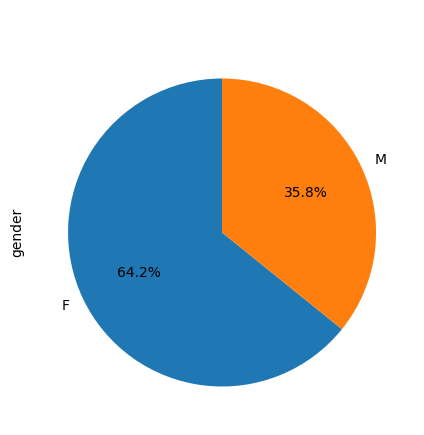

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
data['gender'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
ax.set_title('Gender Pie Chart', fontsize=20, fontweight='bold', color='white')
plt.show()

pada pie chart sesuai feature 'gender', disimpulkan bahwa gender yang mendominasi transaksi pada perusahaan fashion campus yaitu 'Female'

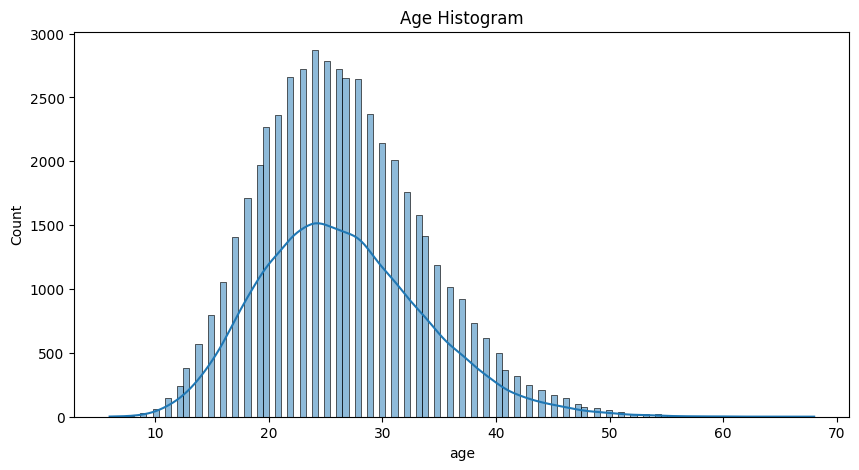

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='age', kde=True)
ax.set_title('Age Histogram')
plt.show()

In [15]:
data['age'].value_counts().head(5)

24    2871
25    2788
26    2725
23    2720
22    2659
Name: age, dtype: int64

didapatkan bahwa 'age' yang mendominasi pada transaksi berkisar pada rentang usia 20 - 24 tahun

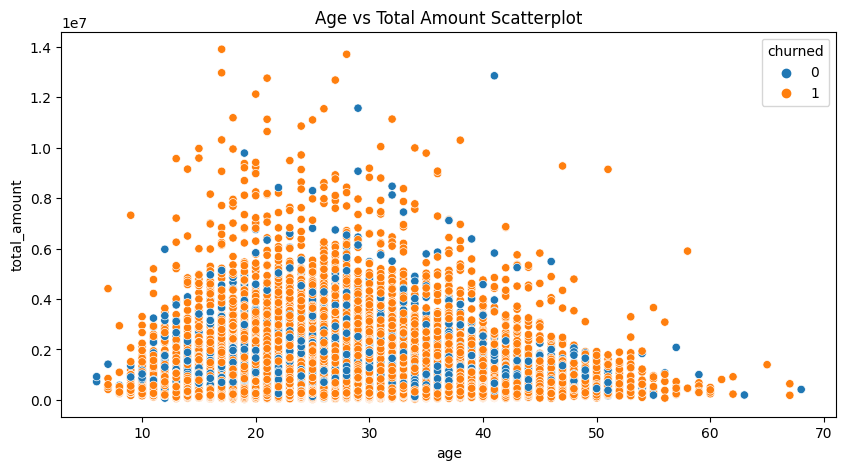

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=data, x='age', y='total_amount', hue='churned')
ax.set_title('Age vs Total Amount Scatterplot')
plt.show()


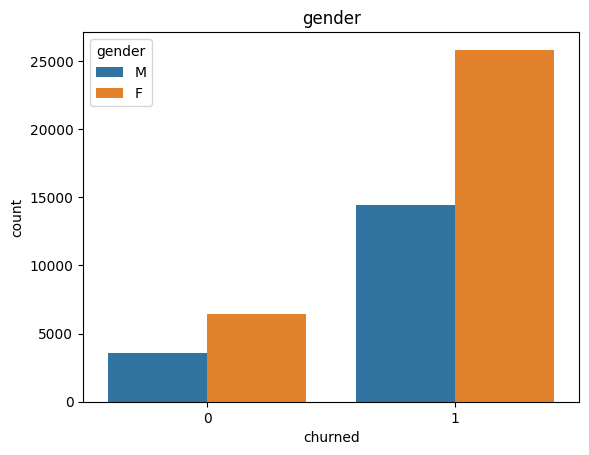

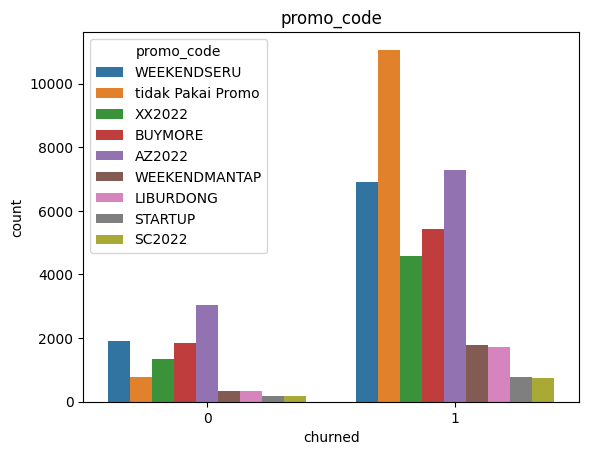

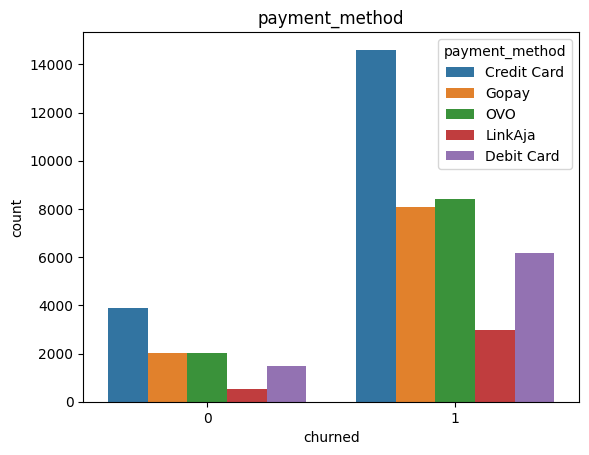

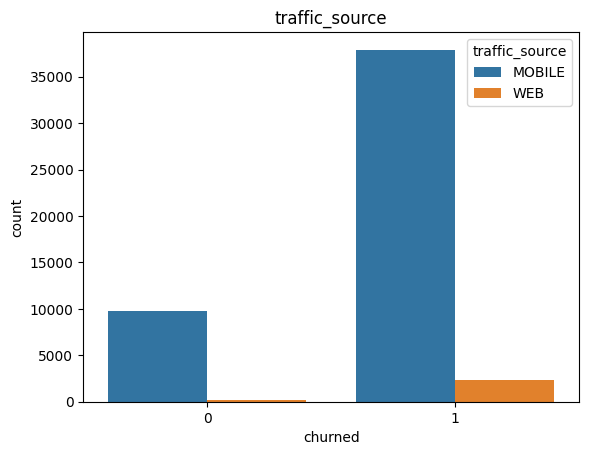

In [94]:
num_col = ['gender','promo_code','payment_method','traffic_source']
for i in num_col:
    sns.countplot(data = data, x = "churned", hue= i)
    plt.title(i)
    plt.show()
# sns.countplot(data = data, x = "gender", hue='churned')

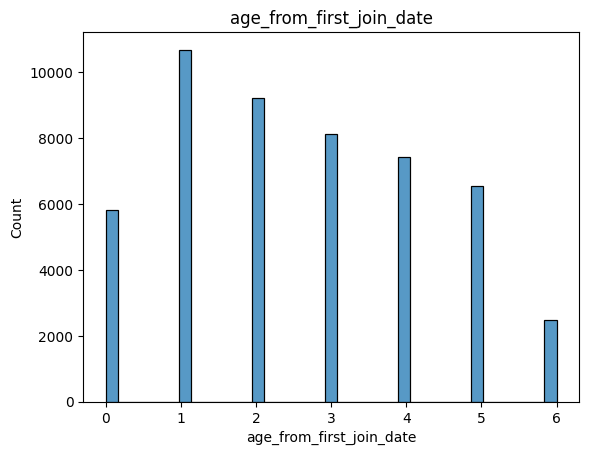

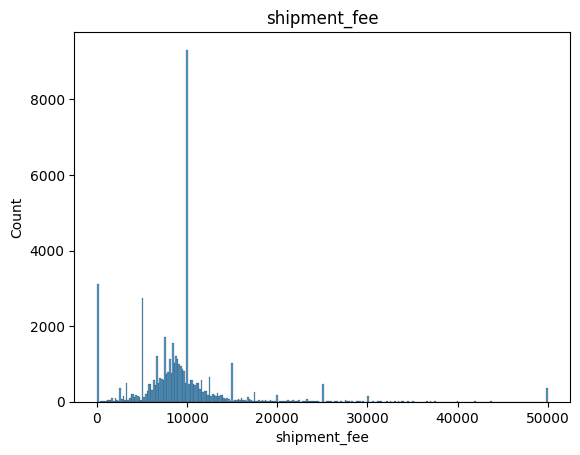

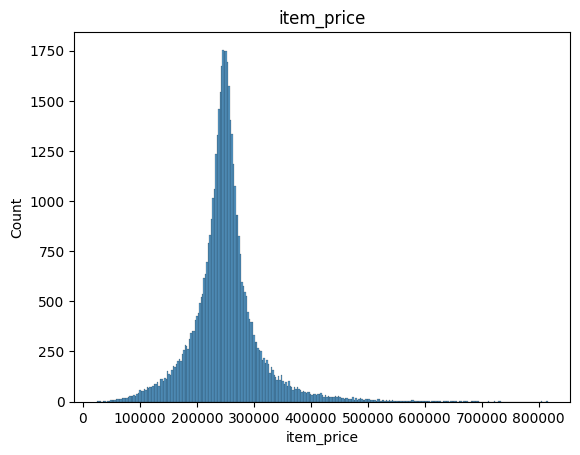

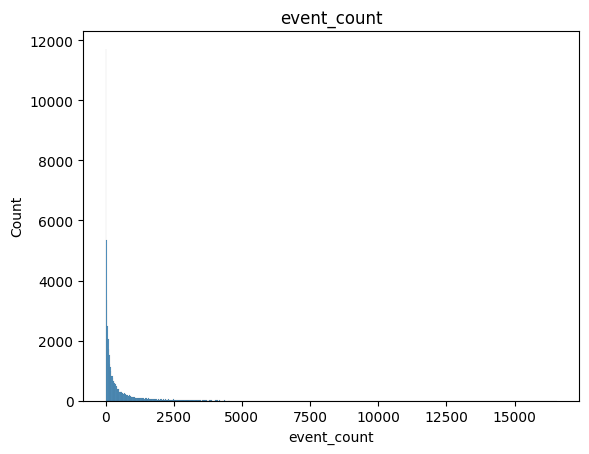

In [19]:
num_cols = ['age_from_first_join_date', 'shipment_fee', 'item_price', 'event_count']
for col in num_cols:
    sns.histplot(data[col])
    plt.title(col)
    plt.show()


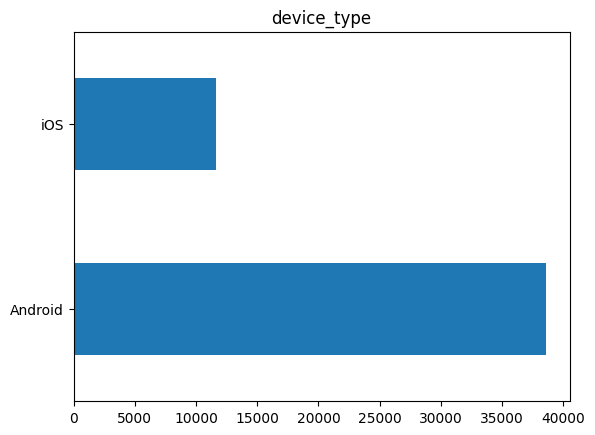

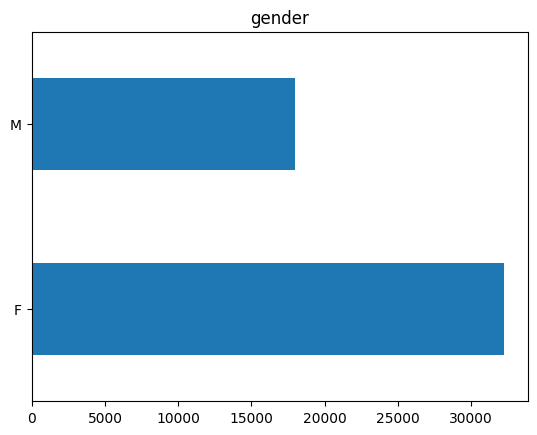

In [20]:
cat_cols = ['device_type', 'gender']
for col in cat_cols:
    data[col].value_counts().plot(kind='barh')
    plt.title(col)
    plt.show()

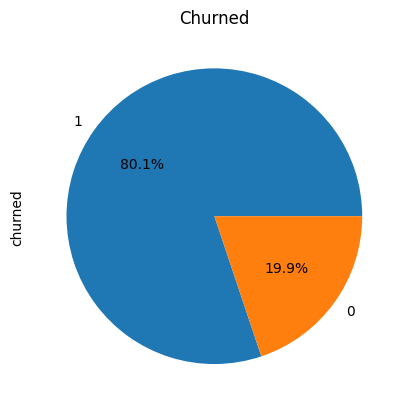

In [21]:
data['churned'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churned')
plt.show()

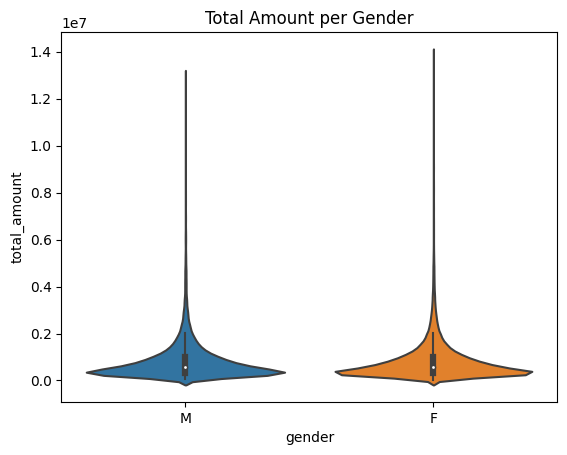

In [22]:
sns.violinplot(x='gender', y='total_amount', data=data)
plt.title('Total Amount per Gender')
plt.show()


In [23]:
top_10_city = data['home_location'].value_counts().head(10)
data.isna().sum()

customer_id                 0
gender                      0
device_type                 0
home_location               0
age                         0
age_from_first_join_date    0
promo_amount                0
shipment_fee                0
total_amount                0
quantity                    0
item_price                  0
event_count                 0
payment_method              0
promo_code                  0
event_name                  0
traffic_source              0
churned                     0
dtype: int64

Text(0.5, 1.0, '10 Besar Asal Kota Customer')

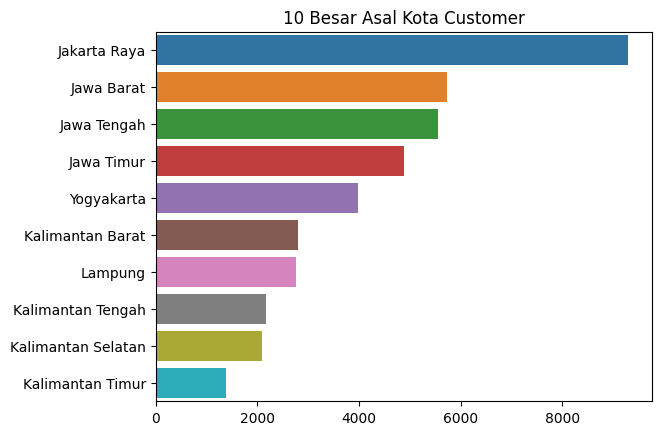

In [24]:
sns.barplot(x=top_10_city.values, y=top_10_city.index)
plt.title("10 Besar Asal Kota Customer")

Text(0.5, 1.0, 'Metode Pembayaran')

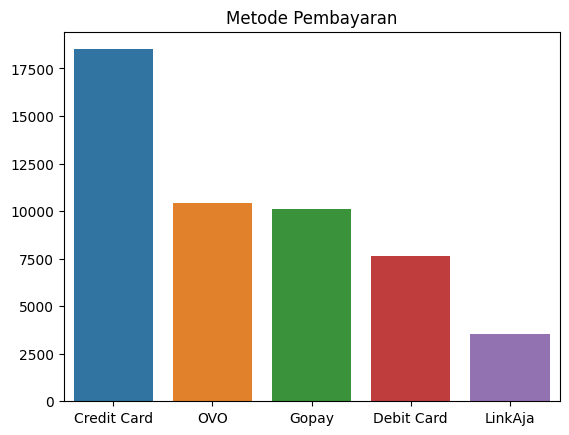

In [25]:
mp = data['payment_method'].value_counts().head()
sns.barplot(x = mp.index, y = mp.values)
plt.title('Metode Pembayaran')

Text(0.5, 1.0, 'usia dari tanggal pertama gabung')

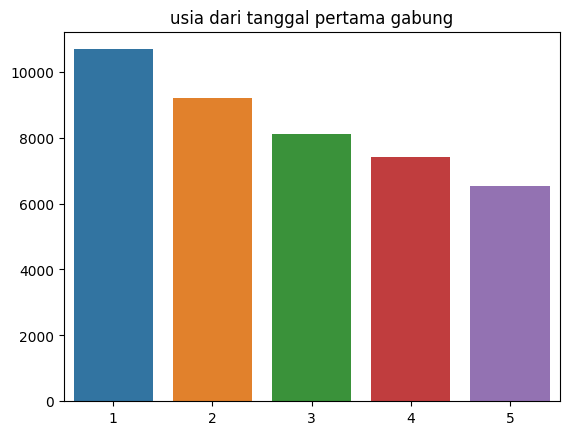

In [26]:
ages = data['age_from_first_join_date'].value_counts().head()
sns.barplot(x = ages.index, y = ages.values)
plt.title('usia dari tanggal pertama gabung')


## DATA MINING AND MODELLING

In [27]:
X = data.drop(['customer_id', 'churned'], axis=1)
y = data['churned']

In [28]:
y.value_counts(normalize= True)

1    0.801477
0    0.198523
Name: churned, dtype: float64

berdasarkan hasil normalisasi pada target variabel, didapatkan bahwa ada ketidakseimbangan yang terjadi pada data target y yaitu churn 80% dan not churn 20%. kita harus membuat data diatas tersebut menjadi seimbang dengan teknik oversampling menggunakan SMOTENC(SMOTE NOMINAL DAN CONTINOUS)

In [29]:
# SMOTENC oversampling
sm = SMOTENC(random_state=0, sampling_strategy={0:40000}, 
             categorical_features=[0, 1, 2, 11, 12, 13, 14])
X_res, y_res = sm.fit_resample(X, y)

In [30]:
y_res.value_counts(normalize=True)

1    0.501663
0    0.498337
Name: churned, dtype: float64

# preprocess data with other methods

In [31]:
data = data.drop(['customer_id','event_name','promo_code'], axis=1)

In [32]:
data.columns

Index(['gender', 'device_type', 'home_location', 'age',
       'age_from_first_join_date', 'promo_amount', 'shipment_fee',
       'total_amount', 'quantity', 'item_price', 'event_count',
       'payment_method', 'traffic_source', 'churned'],
      dtype='object')

Feature Selection

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
data['gender'] = le.fit_transform(data['gender'])
data['device_type'] = le.fit_transform(data['device_type'])
data['home_location'] = le.fit_transform(data['home_location'])
data['payment_method'] = le.fit_transform(data['payment_method'])
data['traffic_source'] = le.fit_transform(data['traffic_source'])

In [35]:
data_norm = (data - data.min()) / (data.max() - data.min())

In [36]:
data

,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,traffic_source,churned
0,1,0,6,36,4,2570.652174,6811.594203,6.589505e+05,1.0,242216.420290,1021,0,0,1
1,0,0,28,22,1,962.375000,6875.000000,5.948251e+05,2.0,252154.875000,221,0,0,1
2,0,0,6,16,1,0.000000,5625.000000,5.142038e+05,1.0,308843.125000,94,2,0,1
3,1,0,14,29,0,9492.000000,15000.000000,1.975330e+05,1.0,192025.000000,14,4,0,1
4,0,0,8,39,3,1818.000000,10000.000000,7.163607e+05,1.0,233470.222222,109,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50236,0,0,16,38,2,731.882353,10588.235294,8.254932e+05,1.0,215035.588235,172,4,0,1
50237,0,0,32,17,2,1148.653846,10320.512821,6.968140e+05,1.0,250702.423077,1356,0,0,0
50238,1,1,19,18,2,0.000000,10000.000000,2.264610e+05,1.0,216461.000000,10,2,0,1
50239,0,0,16,8,4,2484.791667,8958.333333,2.940142e+06,1.0,228675.833333,772,0,0,1


## SPLIT TRAIN TEST DATA

In [37]:
X = data_norm.drop(['churned'], axis=1)
y = data_norm['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ALGORITMA RANDOM FOREST CLASSIFIER

In [38]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
y_pred = rfc.predict(X_test) # Predicting the Test set results

In [40]:
from sklearn.metrics import mean_absolute_error
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('accuracy train :', accuracy_score(y_true=y_train, y_pred= rfc.predict(X_train)))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC : ', roc_auc_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Confusion Matrix:
 [[1627  375]
 [ 397 7650]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      2002
         1.0       0.95      0.95      0.95      8047

    accuracy                           0.92     10049
   macro avg       0.88      0.88      0.88     10049
weighted avg       0.92      0.92      0.92     10049

accuracy train : 1.0
Accuracy: 0.9231764354662155
AUC :  0.8816760783642851
Precision :  0.9532710280373832
Mean Absolute Error: 0.07682356453378446


<Axes: >

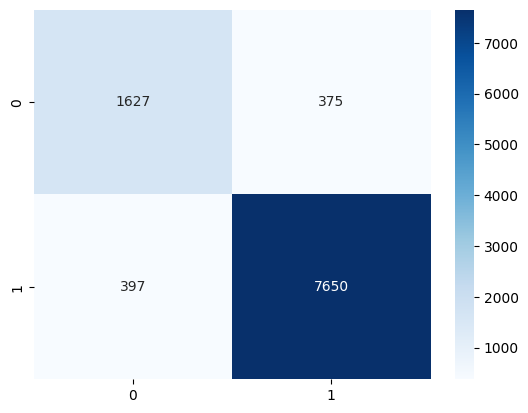

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [42]:
from sklearn.metrics import roc_curve, auc

In [43]:
y_score = rfc.predict_proba(X_test)[:, 1]

In [44]:
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [45]:
roc_auc = auc(fpr, tpr)

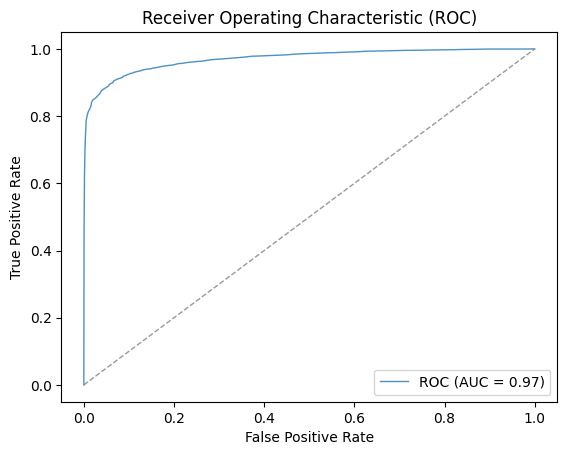

In [46]:
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# ALGORITMA LINEAR SUPPORT VECTOR MACHINE CLASSIFIER(SVC)

In [47]:
svm = LinearSVC(random_state=0)

In [48]:
svm.fit(X_train, y_train)

LinearSVC(random_state=0)

In [49]:
y_pred = svm.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('accuracy train :', accuracy_score(y_true=y_train, y_pred=svm.predict(X_train)))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC dan ROC : ', roc_auc_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Confusion Matrix:
 [[ 881 1121]
 [ 167 7880]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.44      0.58      2002
         1.0       0.88      0.98      0.92      8047

    accuracy                           0.87     10049
   macro avg       0.86      0.71      0.75     10049
weighted avg       0.87      0.87      0.86     10049

accuracy train : 0.873109076433121
Accuracy: 0.8718280425913026
AUC dan ROC :  0.7096534321897812
Precision :  0.8754582824130652
Mean Absolute Error: 0.12817195740869738


<Axes: >

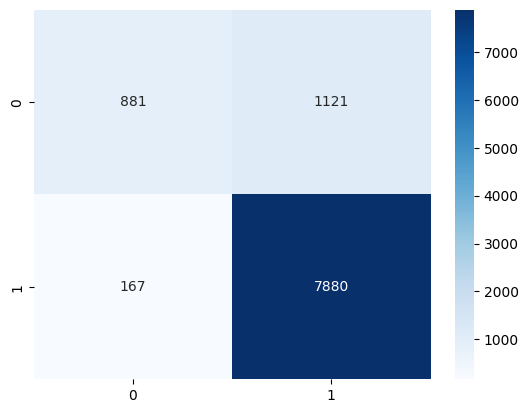

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')